#Analysis of the results

Throught his code we compare and analyze the performacne of CryptoBERT on the news headline datatset

In [1]:
#For the heatmaps
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd #To read files
import numpy as np #Correlation, results analysis

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Retrieve the dataset of news headlines with sentiment annotations. Headlines with multiple financial entities that appearing have been removed.

In [3]:
news_path = '/content/drive/MyDrive/Turing Machine Learining/Sentiment_Analysis/News_headlines_tagged.csv'
df = pd.read_csv(news_path)
print(df.head())

headlines_news = list(df["Title"])
labels_true = list(df["Decisions"])
print("\nNumber of headlines: ", len(headlines_news))

                                               Title  Decisions
0  SpiceJet to issue 6.4 crore warrants to promoters          1
1                  MMTC Q2 net loss at Rs 10.4 crore          1
2  Mid-cap funds can deliver more, stay put: Experts          2
3             Mid caps now turn into market darlings          2
4  Market seeing patience, if not conviction: Pra...          1

Number of headlines:  7903


Get the label predictions of news headlines by Cryptobert

In [4]:
cryptobert_path = "/content/drive/MyDrive/Turing Machine Learining/Sentiment_Analysis/Headlines_tagged_cryptobert.csv"
df = pd.read_csv(cryptobert_path)

labels_pred = list(df["Label"])
print(df.head())
print("\nNumber of testing headlines: ", len(headlines_news))

                                            Headline  Label
0  SpiceJet to issue 6.4 crore warrants to promoters      1
1                  MMTC Q2 net loss at Rs 10.4 crore      1
2  Mid-cap funds can deliver more, stay put: Experts      1
3             Mid caps now turn into market darlings      1
4  Market seeing patience, if not conviction: Pra...      1

Number of testing headlines:  7903


Analysis of results. Confusion matrix.

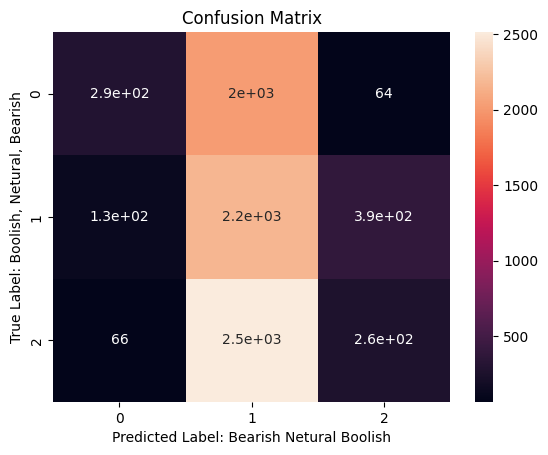

In [5]:
#Confusion matrix
conf_matrix = cm(labels_true, labels_pred)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Label: Bearish Netural Boolish')
plt.ylabel('True Label: Boolish, Netural, Bearish')
plt.title('Confusion Matrix')
plt.show()

Compare the results to true labels

In [6]:
#Classified
neutral_pred = labels_pred.count(1)
pos_pred = labels_pred.count(2)
neg_pred = labels_pred.count(0)
print("Number of negatives predicted: " + str(neg_pred) + " neutrals: " + str(neutral_pred)+ " positives: "+str(pos_pred))

#Actually
neutral_true = labels_true.count(1)
pos_true = labels_true.count(2)
neg_true = labels_true.count(0)
print("Number of negatives truly: " + str(neg_true) + " neutrals: " + str(neutral_true)+ " positives: "+str(pos_true))

Number of negatives predicted: 486 neutrals: 6708 positives: 709
Number of negatives truly: 2376 neutrals: 2689 positives: 2838


Investigate "very bad" predictions (2/0 instead of 0/2)

In [7]:
#Collect indices of headlines that were predicte "very wrong"
def very_wrong_pred(true_labels, pred_labels):
  pred_bool_true_bear = []
  pred_bear_true_bull = []
  for i, (true_label, pred_label) in enumerate(zip(true_labels, pred_labels)):
    if pred_label == 0 and true_label == 2:
        pred_bear_true_bull.append(i) #predicted bear but actuallly bool
    elif pred_label == 2 and true_label == 0:
        pred_bool_true_bear.append(i) #predicted bool but actually bear

  return pred_bool_true_bear, pred_bear_true_bull

pred_bool_true_bear, pred_bear_true_bull = very_wrong_pred(labels_true, labels_pred)

print("Number of 'very wrong' bearish predictions: ", len(pred_bear_true_bull), " Number of 'very wrong' boolish predictions: ", len(pred_bool_true_bear))

Number of 'very wrong' bearish predictions:  66  Number of 'very wrong' boolish predictions:  64


In [8]:
#Given list of the list of 'very bad' prediciton, print a few
def return_very_bad_statements(pred_bool_true_bear, pred_bear_true_bull, num_to_investigate):

#Print a few very bad boolish predictions
  for i in pred_bool_true_bear[:num_to_investigate]:
    print(headlines_news[i], end = ' -> ')
    print("Predicted label: ", labels_pred[i], end = ' ')
    print("True label: ", labels_true[i])

#Print a few very bad bearish predictions
  for i in pred_bear_true_bull[:num_to_investigate]:
    print(headlines_news[i], end = ' -> ')
    print("Predicted label: ", labels_pred[i], end = ' ')
    print("True label: ", labels_true[i])

num_to_investigate = 5
return_very_bad_statements(pred_bool_true_bear, pred_bear_true_bull, num_to_investigate)


Get out of Wipro: Ashwani Gujral -> Predicted label:  2 True label:  0
Sugar falls on mounting stocks, ample supply -> Predicted label:  2 True label:  0
Seek an exit from SKS Microfinance: Rajat Bose -> Predicted label:  2 True label:  0
Fears of regulatory checks drag SKS Micro down -> Predicted label:  2 True label:  0
Bearish on OMCs: Sandeep J Shah, Sampriti Capital -> Predicted label:  2 True label:  0
Wheat prices strengthens on increased offtake -> Predicted label:  0 True label:  2
Bullish on tyres: Sudip Bandyopadhyay -> Predicted label:  0 True label:  2
900-950 ideal for entering TCS: Technical Trends -> Predicted label:  0 True label:  2
Sesa Sterlite shares see marginal gain -> Predicted label:  0 True label:  2
Improved macros to save Rupee from Greece lightning -> Predicted label:  0 True label:  2


Collect number of observation in each box of confusion matrix

In [9]:
#Given confusion matrix return dictioanry of box coordiantes (key) and number of observation (values)
def dict_confusion (conf_matrix):
  matrix_dict = {}

  for i in range(len(conf_matrix)): #Iterate over all rows
    for j in range(len(conf_matrix)): #Iterate over all columns
      key = (i,j) #key is a tuple of coordinates of box position within matrix
      matrix_dict[key] = conf_matrix[i][j]

  return matrix_dict

matrix_dict = dict_confusion(conf_matrix)
print(matrix_dict)

{(0, 0): 291, (0, 1): 2021, (0, 2): 64, (1, 0): 129, (1, 1): 2172, (1, 2): 388, (2, 0): 66, (2, 1): 2515, (2, 2): 257}


Analysis of results. Compute collected measures: accuracy, precision, recall, F1.

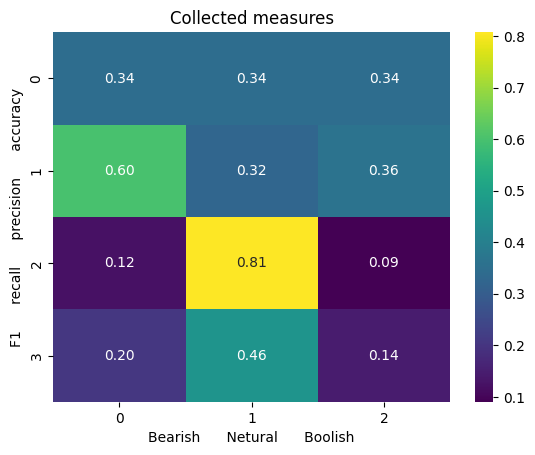

In [10]:
def collected_measures(matrix_dict): #given dictioanry of confusion matrix
  conf_matrix_size = int(np.sqrt(len(matrix_dict))) #compute size of matrix from given dicitionary
  precision = []
  recall = []
  f1 = []
  accuracy = [] #Accuracy the same for all labels
  total_sum_obs = sum(matrix_dict.values())
  a_accuracy = sum(matrix_dict[(i, i)] for i in range(3))/total_sum_obs

  for a in range(3): #Iteratve over all three labels
    accuracy.append(a_accuracy) #store same value three times to show in heatmap

    #Precision: For given class label a find true positives and sum of predicted positives total
    true_pos_false_pos = sum(matrix_dict[(i,a)] for i in range(3))
    a_precision = matrix_dict[(a,a)]/true_pos_false_pos if true_pos_false_pos>0 else -1 #account for denominator 0
    precision.append(a_precision)

    #Recall: For given class label a find true positives and sum of true positives total
    true_pos_false_neg = sum(matrix_dict[(a,i)] for i in range(3))
    a_recall = matrix_dict[(a,a)]/true_pos_false_neg if true_pos_false_neg>0 else -1
    recall.append(a_recall)

    #Compute f1 score
    prec_recall = a_precision+a_recall
    a_f1 = (2*a_precision*a_recall)/prec_recall if prec_recall>0 else -1
    f1.append(a_f1)

  return accuracy, precision, recall, f1

sns.heatmap(collected_measures(matrix_dict), annot=True, cmap='viridis', fmt='.2f')
plt.xlabel('Bearish      Netural      Boolish')
plt.ylabel('F1      recall      precision      accuracy')
plt.title('Collected measures')
plt.show()